In [1]:
%cd ..

d:\Models\person_attribute_recognition


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.optim import lr_scheduler

In [3]:
net = nn.Linear(10, 10)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

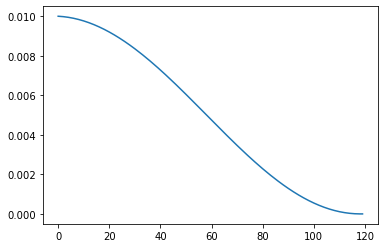

In [4]:
x = []
y = []
cus_lr_scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=120, eta_min=0.000001)
for i in range(120):
    cus_lr_scheduler.step()
    for j in range(3):
        x.append(i)
        y.append(cus_lr_scheduler.get_lr()[0])
        optimizer.step()
plt.plot(x, y)
plt.show()

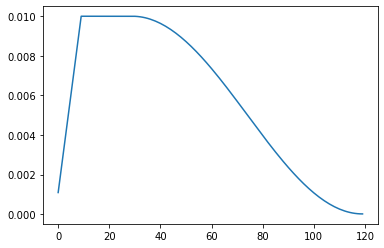

In [5]:
x = []
y = []
from schedulers.warmup import WarmupCosineAnnealingLR
cus_lr_scheduler = WarmupCosineAnnealingLR(optimizer, max_iters=120, delay_iters=30, eta_min_lr=0.00001, warmup_factor=0.01, warmup_iters=10, warmup_method="linear")
for i in range(120):
    cus_lr_scheduler.step()
    for j in range(3):
        x.append(i)
        y.append(cus_lr_scheduler.get_lr()[0])
        optimizer.step()
plt.plot(x, y)
plt.show()

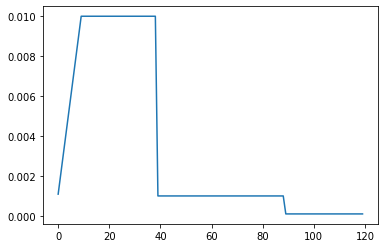

In [6]:
x = []
y = []
from schedulers.warmup import WarmupMultiStepLR
cus_lr_scheduler = WarmupMultiStepLR(optimizer, milestones=[40, 90], gamma=0.1, warmup_factor=0.01, warmup_iters=10)
for i in range(120):
    cus_lr_scheduler.step()
    for j in range(3):
        x.append(i)
        y.append(cus_lr_scheduler.get_lr()[0])
        optimizer.step()
plt.plot(x, y)
plt.show()

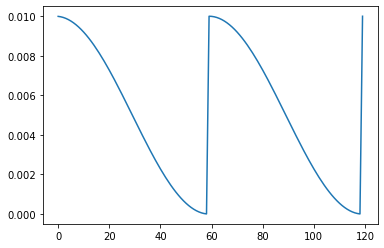

In [7]:
x = []
y = []
cus_lr_scheduler = lr_scheduler.CosineAnnealingWarmRestarts(optimizer,  T_0=60, T_mult=1, eta_min=0)
for i in range(120):
    cus_lr_scheduler.step()
    for j in range(3):
        x.append(i)
        y.append(cus_lr_scheduler.get_lr()[0])
        optimizer.step()
plt.plot(x, y)
plt.show()

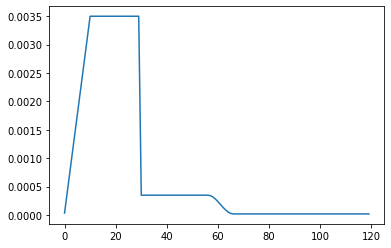

In [16]:
from torch.optim.swa_utils import AveragedModel, SWALR
x = []
y = []
net = nn.Linear(10, 10)
swa_model = AveragedModel(net)
optimizer = torch.optim.SGD(net.parameters(), lr=0.0035)
cus_lr_scheduler = WarmupMultiStepLR(optimizer, milestones=[30, 60, 90], gamma=0.1, warmup_factor=0.01, warmup_iters=10)

swa_start = 55
swa_scheduler = SWALR(optimizer, swa_lr=0.00002)

for i in range(120):
    for j in range(3):
        x.append(i)
        y.append(optimizer.param_groups[-1]['lr'])
        optimizer.step()
    if i > swa_start:
        swa_model.update_parameters(net)
        swa_scheduler.step()
    else:
        cus_lr_scheduler.step()
plt.plot(x, y)
plt.show()